## Inspecting the tf run output for the custom kanto classifier


### Inspect the files contents

In [10]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import os

# Path to your .tfevents file
tfevents_paths = [
    "../final-runs/events.out.tfevents.custom-run-1"
]

# Read the file and print available tags and data
print("Reading tfevents files...\n")
for tfevents_path in tfevents_paths:
    print(f"Processing file: {os.path.basename(tfevents_path)}")
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            print(f"Step: {event.step}, Tag: {value.tag}, Value: {value.simple_value}")


Reading tfevents files...

Processing file: events.out.tfevents.custom-run-1
Step: 55, Tag: Batch Loss, Value: 5.438938617706299
Step: 65, Tag: Batch Loss, Value: 4.89204216003418
Step: 75, Tag: Batch Loss, Value: 4.841513156890869
Step: 85, Tag: Batch Loss, Value: 4.782443523406982
Step: 95, Tag: Batch Loss, Value: 4.410964012145996
Step: 105, Tag: Batch Loss, Value: 4.341932773590088
Step: 1, Tag: Epoch Training Loss, Value: 4.69657039642334
Step: 1, Tag: Epoch Training Accuracy, Value: 9.040995597839355
Step: 1, Tag: Training Precision, Value: 7.542997360229492
Step: 1, Tag: Training Recall, Value: 7.554693698883057
Step: 1, Tag: Training F1 Score, Value: 6.946054935455322
Step: 1, Tag: Training Learning Rate, Value: 0.0005000000237487257
Step: 2, Tag: Epoch Validation Accuracy, Value: 20.319133758544922
Step: 2, Tag: Epoch Validation Loss, Value: 3.653311014175415
Step: 2, Tag: Epoch Validation Precision, Value: 24.616382598876953
Step: 2, Tag: Epoch Validation Recall, Value: 17.95

In [11]:
# Check each unique tag in the file

tags = set()
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            tags.add(value.tag)

print("\nUnique tags in the file:")
for tag in tags:
    print(tag)


Unique tags in the file:
Epoch Validation Accuracy
Class Accuracy/Arbok
Class Accuracy/Charmander
Class Accuracy/Kingler
Class Accuracy/Articuno
Class Accuracy/Magmar
Class Accuracy/Machamp
Class Accuracy/Nidorina
Class Accuracy/Pikachu
Class Accuracy/Ninetales
Epoch Training Accuracy
Class Accuracy/Beedrill
Batch Loss
Class Accuracy/Nidorino
Class Accuracy/Ekans
Class Accuracy/Poliwhirl
Class Accuracy/Weedle
Class Accuracy/Gastly
Class Accuracy/Marowak
Class Accuracy/Seel
Class Accuracy/Kabuto
Class Accuracy/Onix
Class Accuracy/Sandslash
Class Accuracy/Clefable
Class Accuracy/Gloom
Class Accuracy/Moltres
Class Accuracy/Mewtwo
Class Accuracy/Cubone
Epoch Validation Loss
Class Accuracy/Hitmonchan
Class Accuracy/Seadra
Class Accuracy/Eevee
Class Accuracy/Starmie
Class Accuracy/Psyduck
Class Accuracy/Jigglypuff
Class Accuracy/Gengar
Epoch Training Loss
Class Accuracy/Spearow
Class Accuracy/Doduo
Class Accuracy/Clefairy
Class Accuracy/Grimer
Class Accuracy/Alakazam
Class Accuracy/Krabby
C

Epoch 1: Training Loss = 4.69657039642334
Epoch 1: Training Accuracy = 9.040995597839355
Epoch 2: Validation Accuracy = 20.319133758544922
Epoch 2: Validation Loss = 3.653311014175415
Epoch 2: Training Loss = 4.172789096832275
Epoch 2: Training Accuracy = 23.170623779296875
Epoch 3: Validation Accuracy = 44.38589096069336
Epoch 3: Validation Loss = 2.8566811084747314
Epoch 3: Training Loss = 3.9295318126678467
Epoch 3: Training Accuracy = 34.944801330566406
Epoch 4: Validation Accuracy = 56.60957717895508
Epoch 4: Validation Loss = 2.4210867881774902
Epoch 4: Training Loss = 3.7578790187835693
Epoch 4: Training Accuracy = 44.0777702331543
Epoch 5: Validation Accuracy = 62.3188362121582
Epoch 5: Validation Loss = 2.226431369781494
Epoch 5: Training Loss = 3.686985492706299
Epoch 5: Training Accuracy = 48.20063781738281
Epoch 6: Validation Accuracy = 67.25222778320312
Epoch 6: Validation Loss = 2.09808611869812
Epoch 6: Training Loss = 3.577045440673828
Epoch 6: Training Accuracy = 53.36

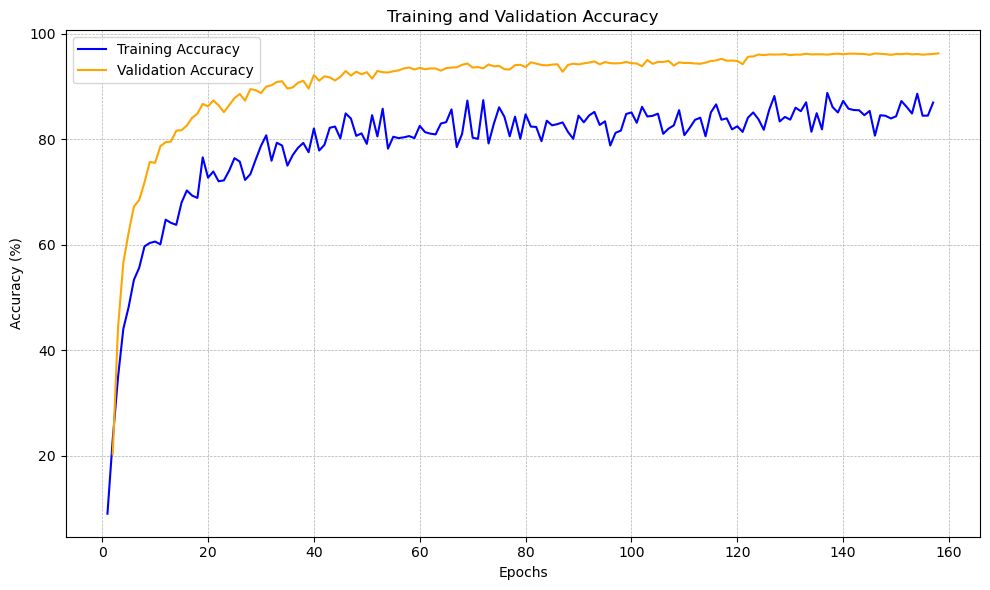

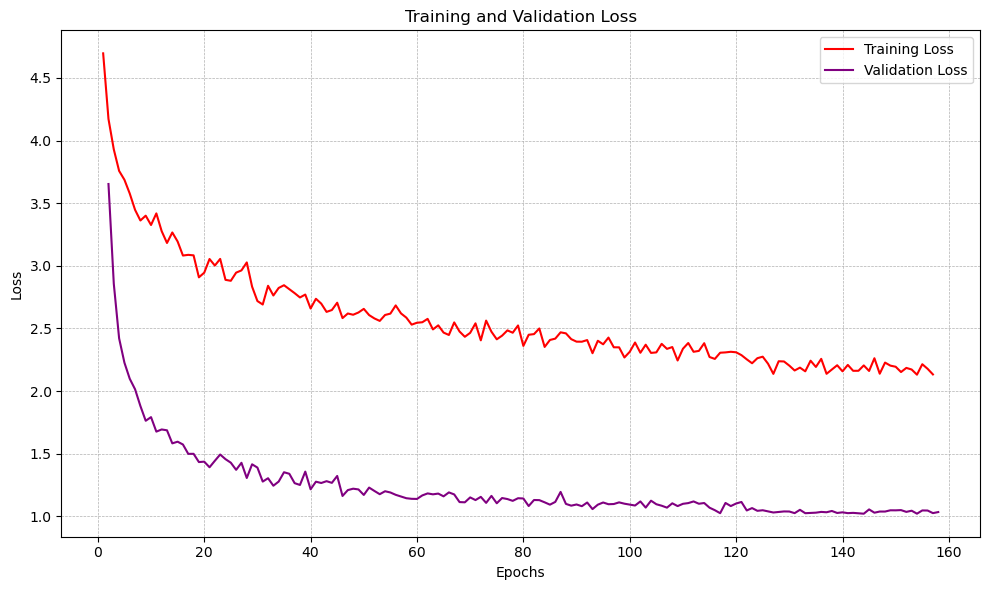

In [12]:
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt


# Initialize empty lists for metrics
epoch_steps_train = []
epoch_train_accuracy = []
epoch_train_loss = []
epoch_steps_val = []
epoch_val_accuracy = []
epoch_val_loss = []

# Initalize empty lists for batch metrics
batch_steps_train = []
batch_loss = []

# Parse the tfevents file
for tfevents_path in tfevents_paths:
    for summary in summary_iterator(tfevents_path):
        for value in summary.summary.value:
            if value.tag == "Epoch Training Accuracy":  # Training accuracy
                epoch_steps_train.append(summary.step)
                print(f"Epoch {summary.step}: Training Accuracy = {value.simple_value}")
                epoch_train_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Validation Accuracy":  # Validation accuracy
                print(f"Epoch {summary.step}: Validation Accuracy = {value.simple_value}")
                epoch_steps_val.append(summary.step)
                epoch_val_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Training Loss":  # Training loss
                print(f"Epoch {summary.step}: Training Loss = {value.simple_value}")
                epoch_train_loss.append(value.simple_value)
            elif value.tag == "Epoch Validation Loss": # Validation loss
                print(f"Epoch {summary.step}: Validation Loss = {value.simple_value}")
                epoch_val_loss.append(value.simple_value)
            elif value.tag == "Batch Loss":  # Batch loss
                batch_steps_train.append(summary.step)
                batch_loss.append(value.simple_value)

#print final values
print("\n")
print("Final epoch: ", epoch_steps_train[-1])
print("Final Training Accuracy: ", epoch_train_accuracy[-1])
print("Final Validation Accuracy: ", epoch_val_accuracy[-1])
print("Final Training Loss: ", epoch_train_loss[-1])
print("Final Validation Loss: ", epoch_val_loss[-1])
print("Final Batch Loss: ", batch_loss[-1])

# Plot 1: Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_accuracy, label="Training Accuracy", color="blue")
plt.plot(epoch_steps_val, epoch_val_accuracy, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_loss, label="Training Loss", color="red")
plt.plot(epoch_steps_val, epoch_val_loss, label="Validation Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


# # Plot 3: Batch Loss
# plt.figure(figsize=(10, 6))
# plt.plot(batch_steps_train, batch_loss, label="Batch Loss", color="green", linestyle="-.")
# plt.xlabel("Steps")
# plt.ylabel("Loss")
# plt.title("Batch Loss")
# plt.legend()
# plt.grid(visible=True, linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.show()



Reading tfevents file...

Top 10 Best Class Accuracies:
1. Articuno: 100.00%
2. Blastoise: 100.00%
3. Butterfree: 100.00%
4. Clefairy: 100.00%
5. Cubone: 100.00%
6. Ditto: 100.00%
7. Dodrio: 100.00%
8. Drowzee: 100.00%
9. Eevee: 100.00%
10. Ekans: 100.00%


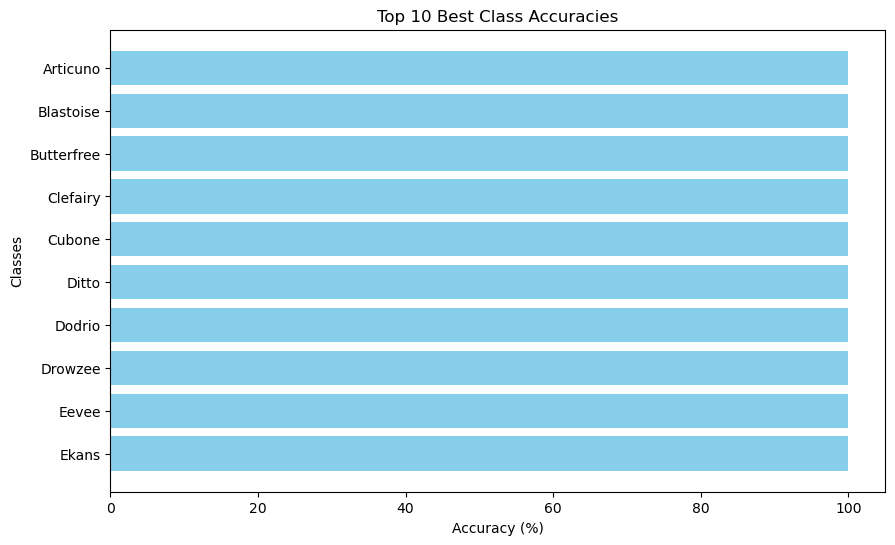

Top 10 Worst Class Accuracies:
1. Nidoran-m: 76.47%
2. Muk: 77.14%
3. Poliwrath: 83.67%
4. Onix: 84.62%
5. Persian: 84.62%
6. Rhyhorn: 85.71%
7. Dratini: 87.72%
8. Weezing: 88.10%
9. Pidgeotto: 88.64%
10. Mew: 89.74%


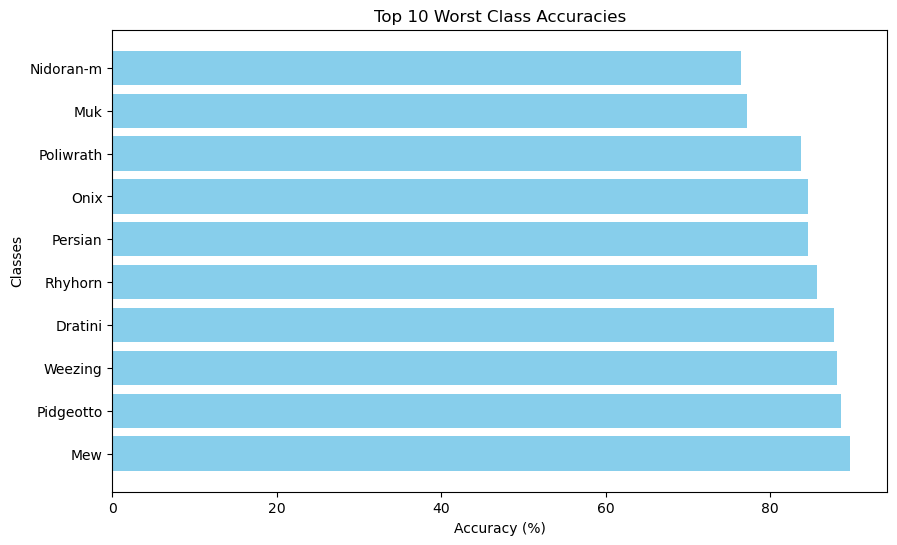

In [13]:
# Get top 10 best class accuracy

from tensorflow.python.summary.summary_iterator import summary_iterator
import re
import matplotlib.pyplot as plt


# Regex pattern to match "Class Accuracy/*"
pattern = r"Class Accuracy/([\w\s-]+)"

# Dictionary to store class accuracies
class_accuracies = {}

# Read the tfevents file
print("Reading tfevents file...\n")
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            # Check if the tag matches "Class Accuracy/*"
            match = re.match(pattern, value.tag)
            if match:
                class_name = match.group(1)  # Extract class name
                class_accuracies[class_name] = value.simple_value  # Store the accuracy

# Sort the classes by accuracy in descending order and select the top 10
top_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*top_10)

# Print the top 10 class accuracies
print("Top 10 Best Class Accuracies:")
for i, (class_name, accuracy) in enumerate(top_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Best Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# now lets get the worst 10 class accuracy
worst_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=False)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*worst_10)

# Print the top 10 class accuracies
print("Top 10 Worst Class Accuracies:")
for i, (class_name, accuracy) in enumerate(worst_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Worst Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



